In [1]:
import pandas as pd

df = pd.read_parquet("training_samples.parquet")
df.rename(columns={"label_name": "label"}, inplace=True)
df

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


In [2]:
from active_vision.core import ActiveLearner

al = ActiveLearner("resnet18")


2025-01-11 18:23:14.343 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, "filepath", "label")

2025-01-11 18:23:14.347 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-11 18:23:14.349 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-11 18:23:14.703 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-11 18:23:14.832 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


2025-01-11 18:23:14.845 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-11 18:23:25.624 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0012022644514217973


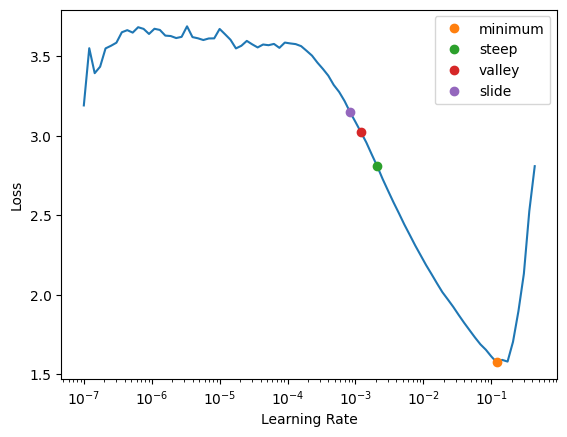

In [5]:
al.lr_find()

2025-01-11 18:23:25.874 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.104823,3.132335,0.250000,00:01


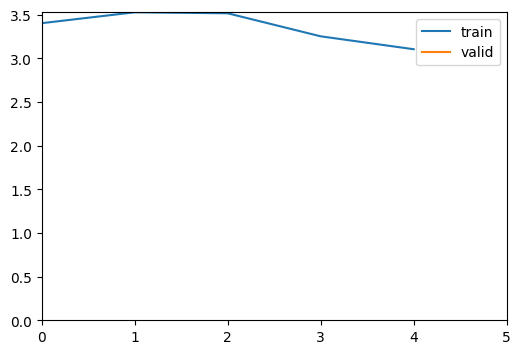

epoch,train_loss,valid_loss,accuracy,time
0,2.508076,2.174976,0.350000,00:01
1,2.121377,1.296451,0.600000,00:01
2,1.676425,1.108575,0.700000,00:01


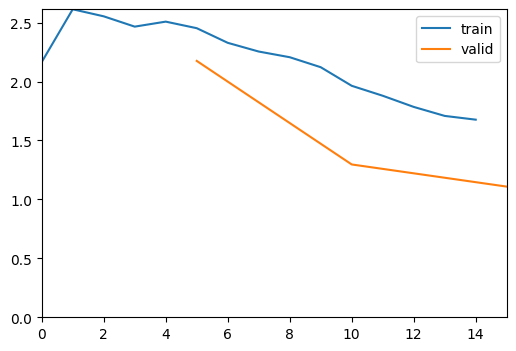

In [6]:
al.train(epochs=3, lr=1e-3)

In [7]:
## Evaluate

import pandas as pd

eval_df = pd.read_parquet("evaluation_samples.parquet")
eval_df.rename(columns={"label_name": "label"}, inplace=True)
eval_df


,filepath,label
0,data/imagenette/2/00000.jpg,cassette player
1,data/imagenette/2/00001.jpg,cassette player
2,data/imagenette/2/00002.jpg,cassette player
3,data/imagenette/2/00003.jpg,cassette player
4,data/imagenette/2/00004.jpg,cassette player
...,...,...
3920,data/imagenette/5/03920.jpg,French horn
3921,data/imagenette/5/03921.jpg,French horn
3922,data/imagenette/5/03922.jpg,French horn
3923,data/imagenette/5/03923.jpg,French horn


In [8]:
al.evaluate(eval_df, "filepath", "label")

2025-01-11 18:23:34.597 | INFO     | active_vision.core:evaluate:110 - Accuracy: 76.56%


0.7656050955414013

In [ ]:
import pandas as pd

df = pd.read_parquet("evaluation_samples.parquet").drop(columns=["label_name"])
filepaths = df["filepath"].tolist()

filepaths


In [ ]:
al.predict(filepaths, batch_size=128)

In [ ]:
uncertain_df = al.sample_uncertain(10)
uncertain_df

In [ ]:
al.add_to_train_set(uncertain_df)

In [ ]:
al.train_set